<a href="https://colab.research.google.com/github/GaganSaini16/Predicting-House-Price-ML-Model/blob/main/Predicting_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the libraries



In [2]:
# Install all required Libraries by "pip install Lib_Name"
# Import the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset "California Housing"

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

Overviewing the dataset

In [4]:
print(type(housing))

<class 'sklearn.utils._bunch.Bunch'>


In [5]:
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [6]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [7]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


Prepare the data




In [9]:
# Converting the data loaded from the sklearn into the dataframe
dataset = pd.DataFrame(housing.data, columns=housing.feature_names)

In [10]:
dataset.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
# Adding the Target/ Labels values into the dataframe in new column
dataset['Price'] = housing.target

In [12]:
dataset.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
# Checking the null values
dataset.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


EDA - Exploratory Data Analysis

In [15]:
# Finding Correlation Coefficient
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


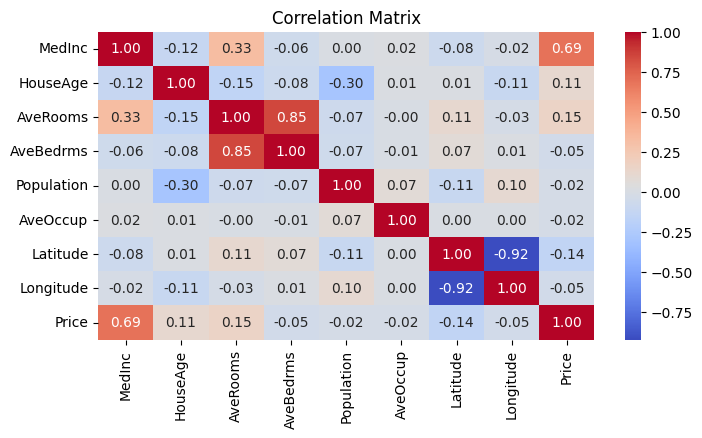

In [16]:
# Visalizing Correlation Matrix in heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Key Findings from the heatmap
1. AveRooms & AveBedrooms are highly correlated
2. Latitude & Longitude are also highly correlated

In [17]:
# Removing one of the highly correlated features
dataset = dataset.drop(['AveBedrms', 'Longitude'], axis=1)

In [18]:
#Spliting the dataset into the Features & Labels

#Features dataset
X = dataset.iloc[:,:-1] # iloc menas index location and its arguments are [(rows range), (columns range)]

#Label/ Target dataset
Y = dataset.iloc[:,-1]

Model Training

In [19]:
#Split the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [20]:
#Normalising the features/ columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [21]:
#Training the data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_norm, Y_train)


LinearRegression()

In [22]:
#Printing the Coefficient of the features
model.coef_

array([ 0.83610282,  0.22105212, -0.05036069,  0.02119718, -0.04873706,
       -0.09443353])

In [23]:
#Printing the Intersept of the features
model.intercept_

2.071946937378876

Model Prediction

In [24]:
pred = model.predict(X_test_norm)
pred

array([1.04675541, 1.53877466, 2.24690965, ..., 4.24983889, 1.67218672,
       1.81933077])

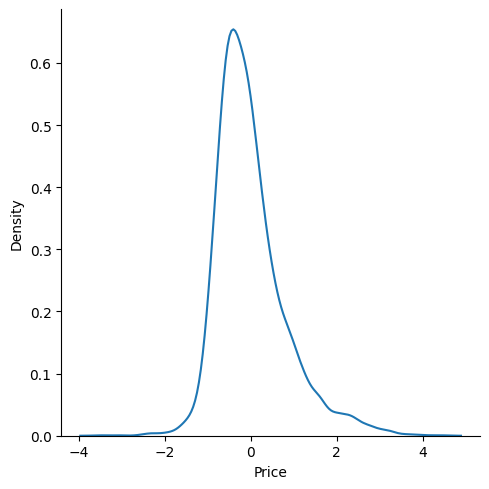

In [25]:
#Residual/Error Distribution
residual = Y_test - pred
sns.displot(residual, kind='kde')

# Giving us the Gausian Distribution

Model Evaluation

In [28]:
# Finding MSE, MAE and r2 score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(Y_test, pred))
print(mean_absolute_error(Y_test, pred))
print(r2_score(Y_test, pred))

# MSE and MAE has to be as minimum
# r2 score and abosulte r2 score has to be as close to 1 as possible

0.6473676847426387
0.5982706370702854
0.5059804263462322


In [35]:
# Finding absolute r2 score
score = r2_score(Y_test, pred)
print(1-(((1-score)*(len(Y_test)-1))/(len(Y_test)-(X_test.shape[1])-1)))

0.5052611549456201


Saving the Model as a pickle file

In [36]:
# Saving a model using 'dumb' function// And 'wb' means w = write mode & b = binary mode
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [37]:
# Load the model and use it for further predictions
# 'rb' means r = read mode and b = binary mode
model_new = pickle.load(open('model.pkl', 'rb'))

In [38]:
#predicting the values using the loaded model
model_new.predict(X_test_norm)

array([1.04675541, 1.53877466, 2.24690965, ..., 4.24983889, 1.67218672,
       1.81933077])